In [2]:
!pip install datasets


INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.8 MB/s eta 0:00:00


In [3]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the 5 datasets
datasets = {
    "imdb": load_dataset("imdb"),
    "ag_news": load_dataset("ag_news"),
    "cifar10": load_dataset("cifar10"),
    "squad": load_dataset("squad"),
    "yelp": load_dataset("yelp_review_full"),
}

# Convert the relevant data splits to pandas DataFrames
df_imdb = pd.DataFrame(datasets["imdb"]["train"])
df_ag_news = pd.DataFrame(datasets["ag_news"]["train"])
df_cifar10 = pd.DataFrame(datasets["cifar10"]["train"])
df_squad = pd.DataFrame(datasets["squad"]["train"])
df_yelp = pd.DataFrame(datasets["yelp"]["train"])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/5.16k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/120M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/23.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/299M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/23.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

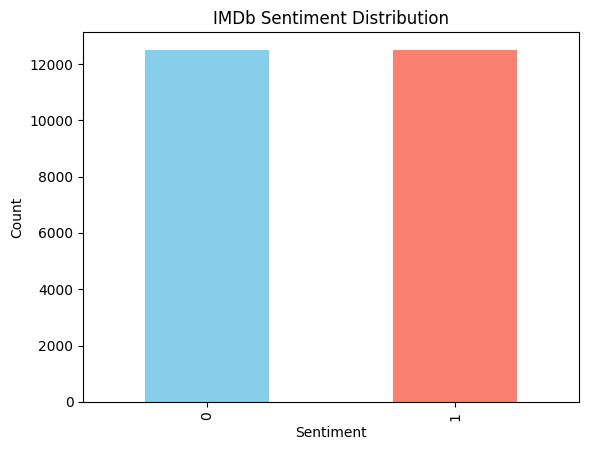

In [4]:
# Analyze IMDb sentiment distribution
imdb_sentiment_dist = df_imdb["label"].value_counts()
imdb_sentiment_dist.plot(kind="bar", title="IMDb Sentiment Distribution", color=['skyblue', 'salmon'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


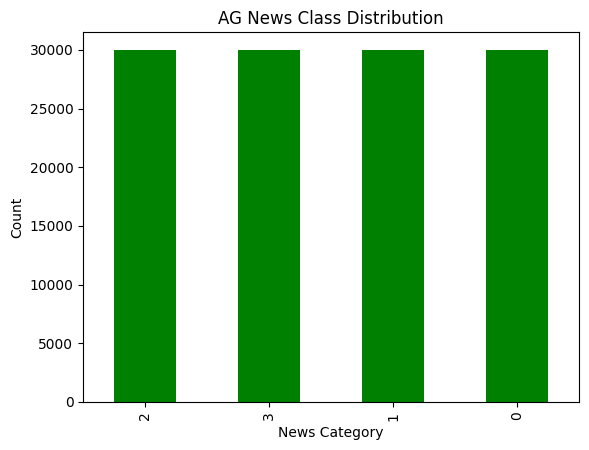

In [5]:
# Analyze AG News class distribution
ag_news_class_dist = df_ag_news["label"].value_counts()
ag_news_class_dist.plot(kind="bar", title="AG News Class Distribution", color='green')
plt.xlabel("News Category")
plt.ylabel("Count")
plt.show()


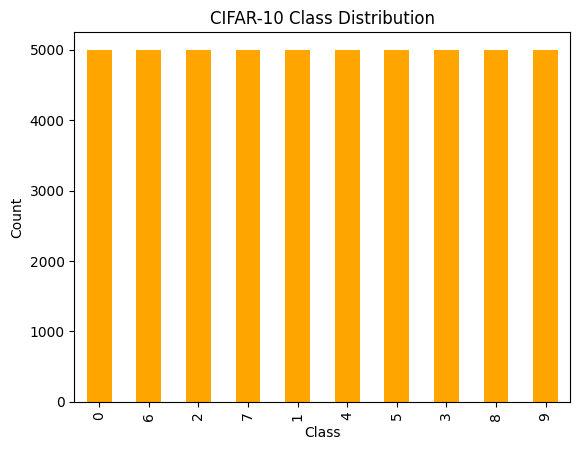

In [6]:
# Analyze CIFAR-10 class distribution
cifar10_class_dist = df_cifar10["label"].value_counts()
cifar10_class_dist.plot(kind="bar", title="CIFAR-10 Class Distribution", color='orange')
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


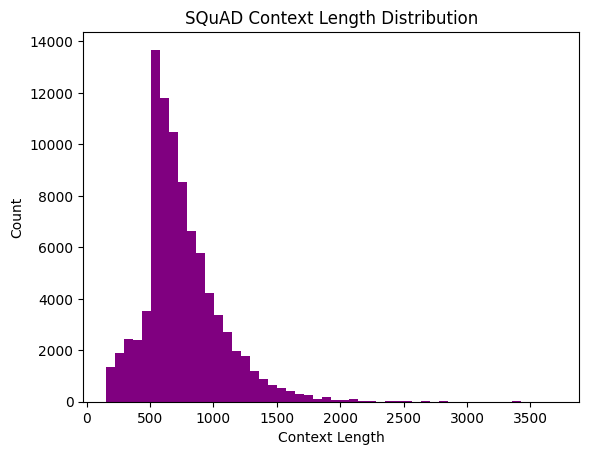

In [7]:
# Analyze context length in SQuAD
squad_context_lengths = df_squad["context"].apply(len)
plt.hist(squad_context_lengths, bins=50, color='purple')
plt.title("SQuAD Context Length Distribution")
plt.xlabel("Context Length")
plt.ylabel("Count")
plt.show()


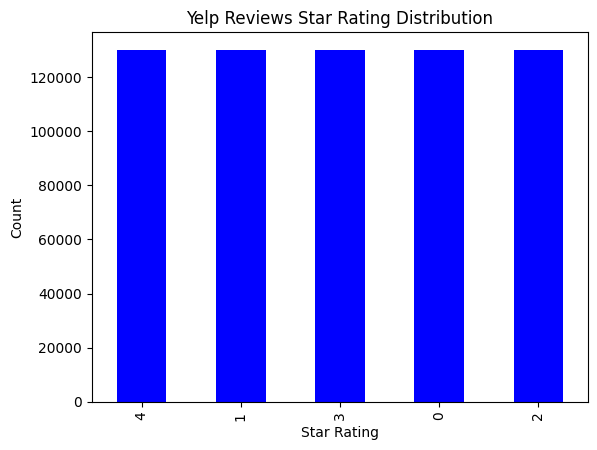

In [8]:
# Analyze Yelp review star rating distribution
yelp_rating_dist = df_yelp["label"].value_counts()
yelp_rating_dist.plot(kind="bar", title="Yelp Reviews Star Rating Distribution", color='blue')
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.show()


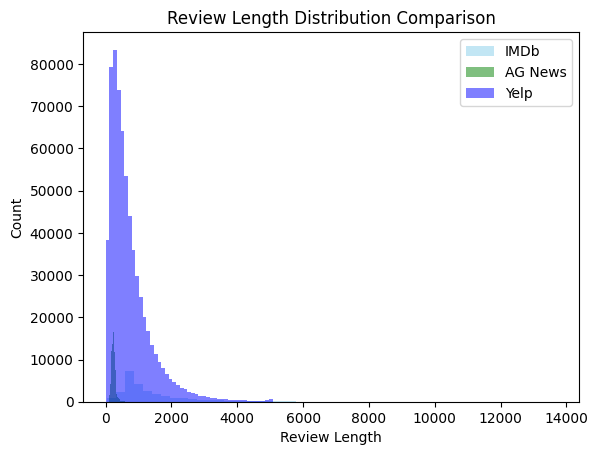

In [9]:
# Compare review lengths for IMDb, AG News, and Yelp
imdb_lengths = df_imdb["text"].apply(len)
ag_news_lengths = df_ag_news["text"].apply(len)
yelp_lengths = df_yelp["text"].apply(len)

plt.hist(imdb_lengths, bins=50, alpha=0.5, label="IMDb", color='skyblue')
plt.hist(ag_news_lengths, bins=50, alpha=0.5, label="AG News", color='green')
plt.hist(yelp_lengths, bins=50, alpha=0.5, label="Yelp", color='blue')
plt.legend(loc='upper right')
plt.title("Review Length Distribution Comparison")
plt.xlabel("Review Length")
plt.ylabel("Count")
plt.show()
